In [2]:
from sympy import *
import math

### Scalars, Vectors, Matrices and Tensors

- __Scalars__ A scalar is just a single number. Ex: 1, $\pi$, $\frac{7}{22}$, $e$. In python integers and floats are scalars.

In [3]:
a = 3

b = math.pi

print(a,b, type(a), type(b))

3 3.141592653589793 <class 'int'> <class 'float'>


- __Vectors__: A vector is an array of numbers. In python we can consider numpy ndarray's as the representatives of the vectors. Possible notations for the vectors: bold letters $\textbf{X}, \textbf{x}$, with an arrow $\vec{X}, \vec{x}$ or just $V, v$ when it is clear from the context that these are vectors.

In [5]:
import numpy as np

x = np.array([11, math.e, 5])


## note the shape is just (3,)
## we will see that this is different than (3,1)

print(x, x.shape, type(x))

[11.          2.71828183  5.        ] (3,) <class 'numpy.ndarray'>


In [6]:
## note that vectors has indices or coefficients:

x_1 = x[0]

x_2 = x[1]

x_3 = x[2]

print(x_1,x_2,x_3)

11.0 2.718281828459045 5.0


- __Matrices__ A matrix is a 2D array of numbers: Again we will use ndarrays for matrices.


In [7]:
A = np.array([[1,2,3], [11,5,7], [13,17,19], [1,0,2]])
print(A, A.shape, type(A))

[[ 1  2  3]
 [11  5  7]
 [13 17 19]
 [ 1  0  2]] (4, 3) <class 'numpy.ndarray'>


In [8]:
## note that we can access the entries within a matrix with the indices too.
## Also note that python starts counting from 0
print(A[0,1], A[0, 2], A[2, 2])

2 3 19


In [7]:
## We can also access a row in a matrix

print('The second row of A: ', A[1,: ],'\nThe third row of A: ', A[2, :])


## We can also access the columns

print('The second column of A: ', A[:,1],'\nThe third column of A: ', A[:,2])


The second row of A:  [11  5  7] 
The third row of A:  [13 17 19]
The second column of A:  [ 2  5 17  0] 
The third column of A:  [ 3  7 19  2]


In [8]:
a = np.array([1,2,3])


## From a (3,) dimensional array we can create
## column and row vectors in different ways
display(a[np.newaxis, :], a[:, np.newaxis])

## or we can use reshape method
display(a.reshape(3,1), a.reshape(1,3))

## also there is a transpose method available

display(a, a.reshape(1,3), a.reshape(1,3).transpose())

## note that a and a.reshape(1,3) don't have the same structure

display(a.shape, a.reshape(1,3).shape, a.reshape(1,3).transpose().shape)

array([[1, 2, 3]])

array([[1],
       [2],
       [3]])

array([[1],
       [2],
       [3]])

array([[1, 2, 3]])

array([1, 2, 3])

array([[1, 2, 3]])

array([[1],
       [2],
       [3]])

(3,)

(1, 3)

(3, 1)

- __Tensors__ An array of numbers arranged on a regular grid with a variable number of axis is known as a tensor. We can create tensors with numpy but there will be other libraries also that is using tensors. 

In [9]:
## Properties of the tensors will not be discussed in this notebook

T = np.array([[[1,2,3],    [4,5,6],    [7,8,9]],
              [[11,12,13], [14,15,16], [17,18,19]],
              [[21,22,23], [24,25,26], [27,28,29]]
             ])
T.shape

(3, 3, 3)

## Multiplying Vectors and Matrices

In [10]:
B = np.array([[1,0], 
              [1,2], 
              [0,2]
             ])
display(A, B, A.dot(B))

display(A.shape, B.shape, A.dot(B).shape)

array([[ 1,  2,  3],
       [11,  5,  7],
       [13, 17, 19],
       [ 1,  0,  2]])

array([[1, 0],
       [1, 2],
       [0, 2]])

array([[ 3, 10],
       [16, 24],
       [30, 72],
       [ 1,  4]])

(4, 3)

(3, 2)

(4, 2)

In [11]:
## we can use 'dot' product to multiply two vectors.
## here a, b are of shape (3,)
## Note that the result will be a scalar

a = np.array([1,2,3])
b = np.array([1,0,1])

a.dot(b)

4

In [11]:
## If the vectors have shape (1,3) then this method would not work

a = np.array([[1,2,3]])

b = np.array([[1,0,1]])

a.dot(b)

ValueError: shapes (1,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [13]:
## instead we can use transpose first and then dot

## here a is of shape (1,3) and b.transpose is of shape (3,1)
## so the result will be of shape (1,1)

print(a.dot(b.transpose()),a.dot(b.transpose()).shape )

[[4]] (1, 1)


In [14]:
## If we take first a.transpose what do we get?

print(a.transpose().dot(b),a.transpose().dot(b).shape )

[[1 0 1]
 [2 0 2]
 [3 0 3]] (3, 3)


In [15]:
## we can use np.linalg module to do some linear algebra
## for example let's use np.linalg.inv for taking inverse of a matrix

A = np.array([[1,2,3], [1,0,13], [0,2,1]])

np.linalg.inv(A)

array([[ 1.18181818, -0.18181818, -1.18181818],
       [ 0.04545455, -0.04545455,  0.45454545],
       [-0.09090909,  0.09090909,  0.09090909]])

In [15]:
## note that not all matrices are invertible
## np.linalg.inv gives an error when we try to 
## invert a non-invertible matrix
A = np.array([[1,2,3], [1,0,2], [0,2,1]])


print(np.linalg.det(A)) 
np.linalg.inv(A)

0.0


LinAlgError: Singular matrix

In [17]:
## There is also .eig method that allow
## allow us to find eigenvalues and eigenvectors
## note that the matrix should be a square matrix

eig_val, eig_vec = np.linalg.eig(A)

display(eig_val, eig_vec)

array([-1.44948974e+00,  3.05311332e-16,  3.44948974e+00])

array([[-0.14072662,  0.87287156,  0.81511137],
       [-0.76688827,  0.21821789,  0.44872717],
       [ 0.62616165, -0.43643578,  0.3663842 ]])

In [18]:
## Two things returned from np.linalg.eig 
## 1: an array of shape (n, ) for the eigenvalues
## 2: an array of shape (n,n) for eigenvectors as columns

c = eig_val[0]*eig_vec[:,0]

d = A.dot(eig_vec[:,0])

display(c,d)

array([ 0.20398179,  1.11159667, -0.90761488])

array([ 0.20398179,  1.11159667, -0.90761488])

Now we can see how to use matrix algrebra to solve least square problem.

In [17]:
import pandas as pd

import numpy as np

In [18]:
df = pd.read_csv('data/Income1.csv', index_col = 0)

In [19]:
df['intercept'] = np.zeros(len(df))

In [20]:
df['intercept'] = 1

In [22]:
df.head()

,Education,Income,intercept
1,10.000000,26.658839,1
2,10.401338,27.306435,1
3,10.842809,22.132410,1
4,11.244147,21.169841,1
5,11.645485,15.192634,1


In [23]:
X = df[['Education', 'intercept']].values

y = df['Income'].values

One (who?) can show that the solution $\beta$ to the least square regression given as: 

$$ \beta = (X^{\top}X)^{-1}X^{\top}y$$

(I know this is a little bit hard to buy but you can check [Wikipedia-Linear Regression](https://en.wikipedia.org/wiki/Linear_regression))

In [24]:
X_tr_X_inv = np.linalg.inv(X.transpose().dot(X))

In [25]:
X_tr_X_inv.dot(X.transpose()).dot(y)

array([  5.59948287, -39.44625668])

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
X  = df.Education.values.reshape(-1,1)
lr = LinearRegression()

lr.fit(X,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print(lr.coef_, lr.intercept_)

[5.59948287] -39.446256679096194


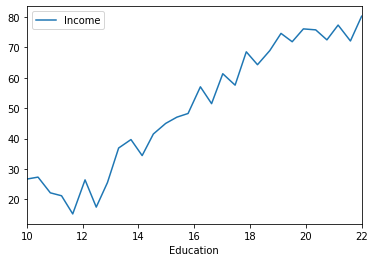

In [33]:
df.plot(x='Education',y="Income");

## Extra Sources

[Penn State Matrix Algebra Review](https://newonlinecourses.science.psu.edu/statprogram/reviews/matrix-algebra)

[IBM's matrix algebra class](https://cognitiveclass.ai/blog/nested-lists-multidimensional-numpy-arrays)